In [1]:
# Common useful packages
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import copy
import spectral

# module that is useful for reloading packages
import importlib

# Scripts associated with the SML4SI textbook
import hyperspectral_gta_data as hsi_data
import hsi_classificatiom as hc
importlib.reload(hc)

<module 'hsi_classificatiom' from 'c:\\Users\\wb8by\\Documents\\GitHub\\Machine-Learning-for-Spectral-Imaging\\HW_Starter_Code_Files\\Project1_Partt1_Classification - starter_code\\hsi_classificatiom.py'>

# Part 1: Open the image and load the data as a numpy array.

In [2]:
hsi_data.available_datasets()

Available Images:
 WashingtonDC
 MicroscenePolymers
 FabricVehicleDetecitonRIT
 VegBaccharisUPWINS
 PaintDetectionUPWINS


In [3]:
hsi_data.download('FabricVehicleDetecitonRIT')
fname1 = hsi_data.get_fname('FabricVehicleDetecitonRIT')

hsi_data.download('VegBaccharisUPWINS')
fname2 = hsi_data.get_fname('VegBaccharisUPWINS')

hsi_data.download('PaintDetectionUPWINS')
fname3 = hsi_data.get_fname('PaintDetectionUPWINS')

Filename: spectral_images/Detection_Test_Cooke_City_RIT/self_test/self_test/HyMap/self_test_refl.img


Downloading...
From (original): https://drive.google.com/uc?id=1e5SloCAzXGIfDRlzhqYcmQ5JUMC8DweC
From (redirected): https://drive.google.com/uc?id=1e5SloCAzXGIfDRlzhqYcmQ5JUMC8DweC&confirm=t&uuid=a69fb7c1-4bf5-487d-aef2-51cc633af82d
To: c:\Users\wb8by\Documents\GitHub\Machine-Learning-for-Spectral-Imaging\HW_Starter_Code_Files\Project1_Partt1_Classification - starter_code\spectral_images\Vegetation_Baccharis_halmifolia_UPWINS.zip
100%|██████████| 86.2M/86.2M [00:01<00:00, 43.9MB/s]


File saved as: .//spectral_images/Vegetation_Baccharis_halmifolia_UPWINS/Morven_Baccharis_h_or_ref
File saved as: .//spectral_images/Vegetation_Baccharis_halmifolia_UPWINS/Morven_Baccharis_h_or_ref.hdr
Filename: spectral_images/Vegetation_Baccharis_halmifolia_UPWINS/Morven_Baccharis_h_or_ref


Downloading...
From (original): https://drive.google.com/uc?id=1WX_efoG5iIIYjg5Juh9tDz-Tk1BrElrk
From (redirected): https://drive.google.com/uc?id=1WX_efoG5iIIYjg5Juh9tDz-Tk1BrElrk&confirm=t&uuid=09bbfab9-a956-4d01-89de-7e22bd64fb11
To: c:\Users\wb8by\Documents\GitHub\Machine-Learning-for-Spectral-Imaging\HW_Starter_Code_Files\Project1_Partt1_Classification - starter_code\spectral_images\Morven_paint_samples_or_ref.zip
100%|██████████| 337M/337M [00:10<00:00, 32.3MB/s] 


File saved as: .//spectral_images/Morven_paint_samples_or_ref/Morven_paint_samples_or_ref
File saved as: .//spectral_images/Morven_paint_samples_or_ref/Morven_paint_samples_or_ref.hdr
Filename: spectral_images/Morven_paint_samples_or_ref/Morven_paint_samples_or_ref


In [5]:
fname = fname2

# Open the image and read into an array
im = spectral.envi.open(fname+'.hdr', fname)
wl = np.asarray(im.bands.centers)
# Load the image into memory
im.Arr = im.load()
print(f'Shape of Im.Arr = {im.Arr.shape}')
im.List = np.reshape(im.Arr, (im.nrows*im.ncols, im.nbands))
print(f'Shape of im.List = {im.List.shape}')



Shape of Im.Arr = (300, 600, 343)
Shape of im.List = (180000, 343)


C:/Users/wb8by/Documents/GitHub/Machine-Learning-for-Spectral-Imaging/Book_Modules/ground_truth_images/reflectance_image_polymers_surfaces.txt
Loading groundtruth...
Reading data code goes here.
Total time: 0.00 seconds
Training...
Training code goes here.
Total time: 0.00 seconds
Predicting...
Predicting code goes here.
Total time: 0.00 seconds


AttributeError: 'GaussianClassification' object has no attribute 'gt_im'

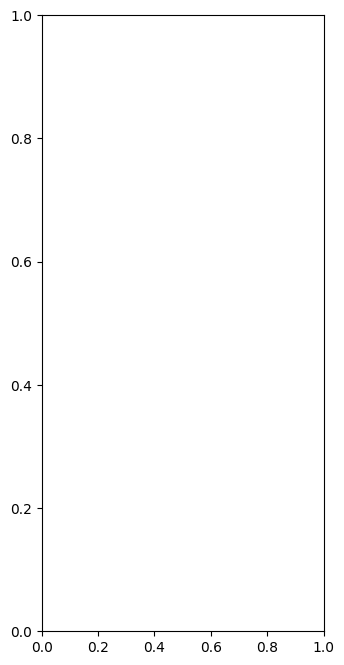

In [10]:
importlib.reload(hc)
fdir = 'C:/Users/wb8by/Documents/GitHub/Machine-Learning-for-Spectral-Imaging/Book_Modules/'

# load the image data
cl = hc.GaussianClassification(im)

# load the ground truth data
fname = fdir+'ground_truth_images/reflectance_image_polymers_surfaces.txt'
print(fname)
cl.load_gt(fname, verbose=True)

# train the classifiers (compute means and states)
cl.train(verbose=True)

# predict class labels
cl.predict(verbose=True)

cl.plot_class_sideBySide(fs=8)

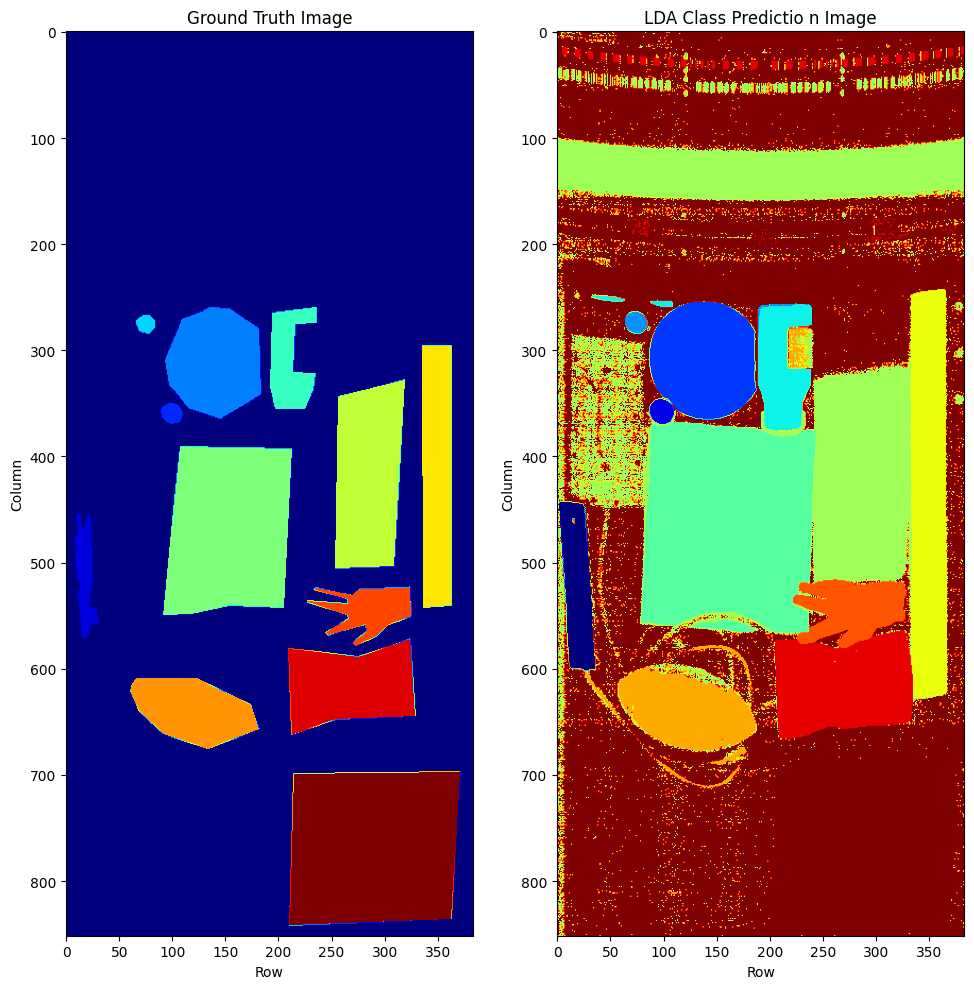

In [74]:
cl.plot_class_sideBySide()

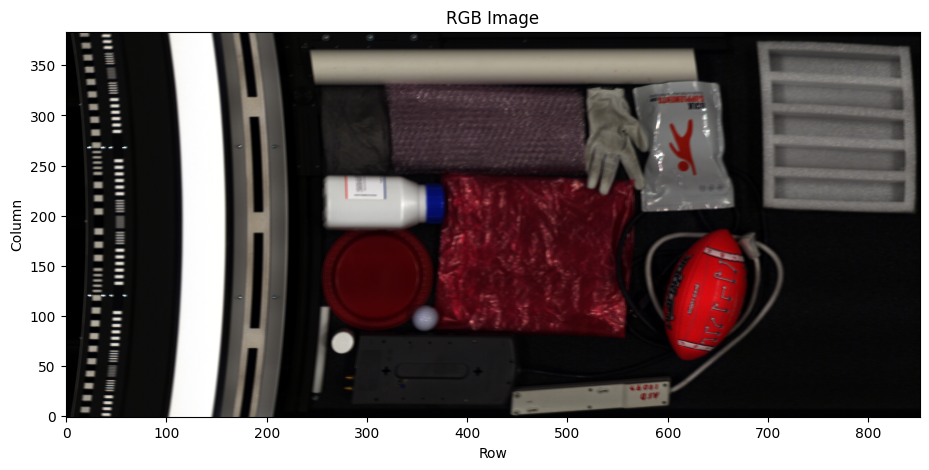

In [75]:
cl.plot_RGB()

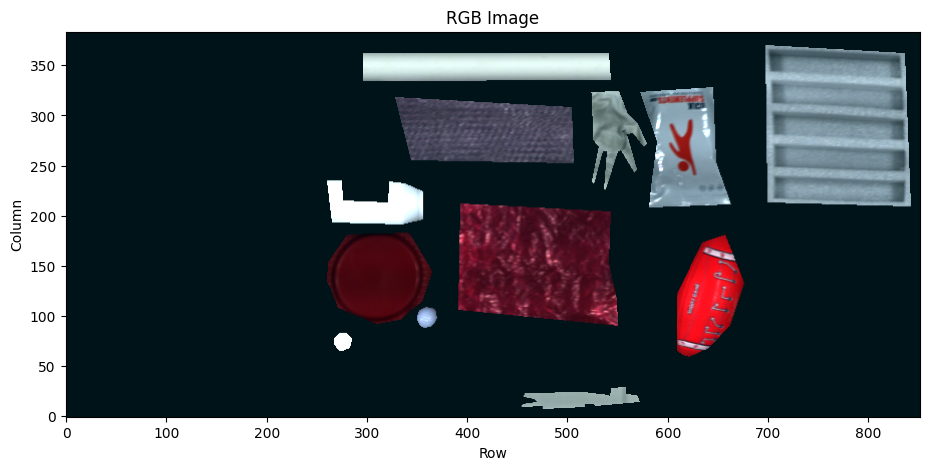

In [76]:
cl.plt_RGB_classes()

# PART 2: Viewing a scatterplot of the hyperspectral image.

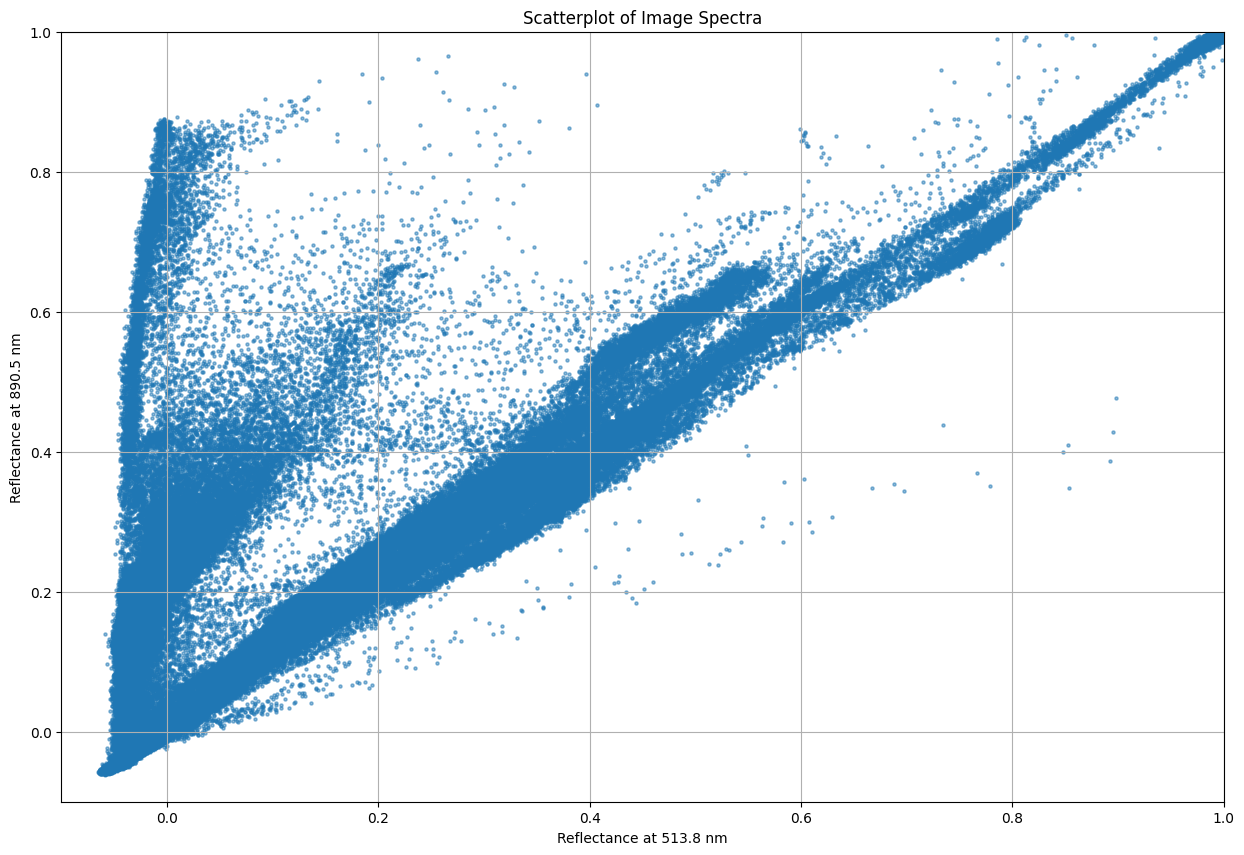

In [77]:
cl.plt_scatter()
plt.xlim([-0.1,1])
plt.ylim([-0.1,1]);

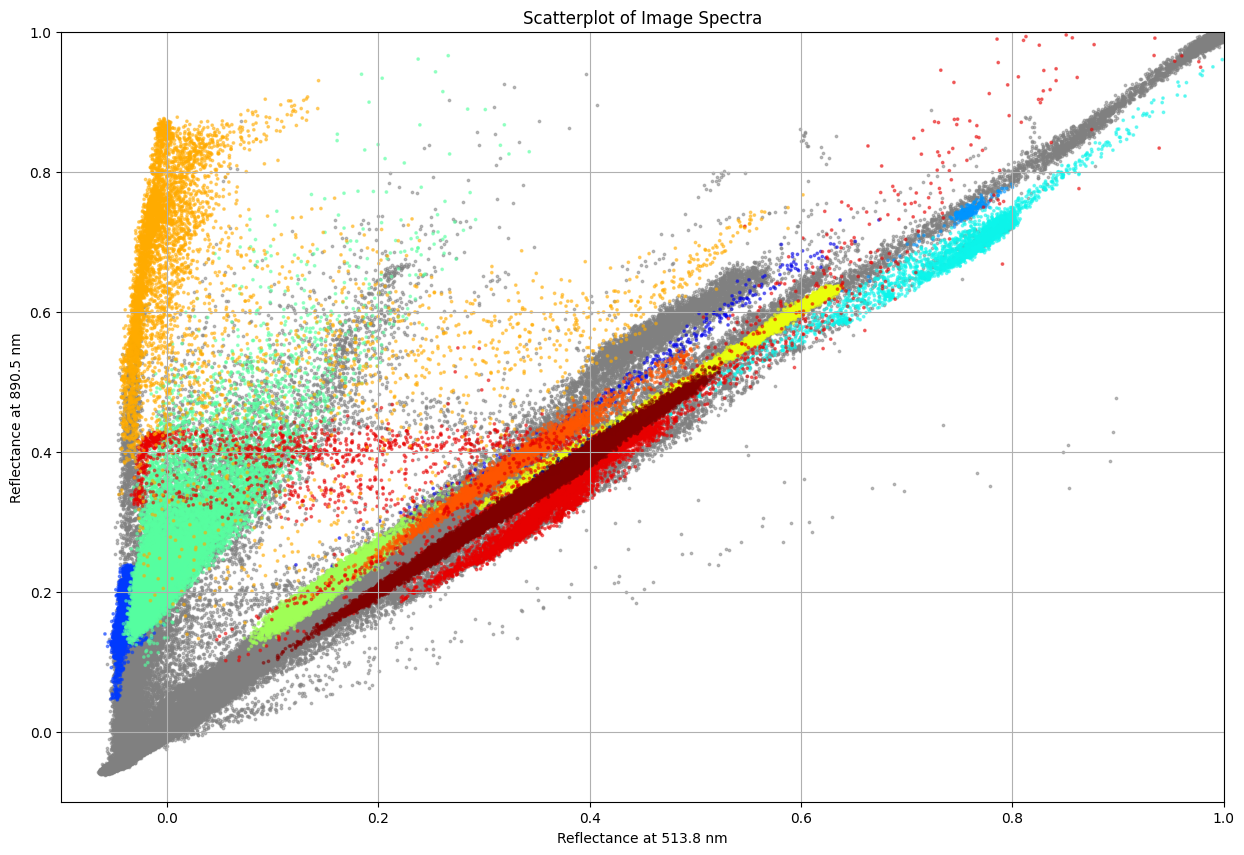

In [78]:
cl.plt_scatter_gt()
plt.xlim([-0.1,1])
plt.ylim([-0.1,1]);

# Part 3: Examining Individual Classes

In [79]:
cl.class_names

['surge_protector_hard',
 'ping_pong_ball',
 'red_lid',
 'medicine_bottle_cap',
 'plastic_bottle',
 'red_bubble_wrap',
 'clear_bubble_wrap',
 'PVC_plumbing_pipe',
 'polymer_football',
 'gloave',
 'foil_bag',
 'foam_packaging']

##  Part 4: Examining the means and covariances:

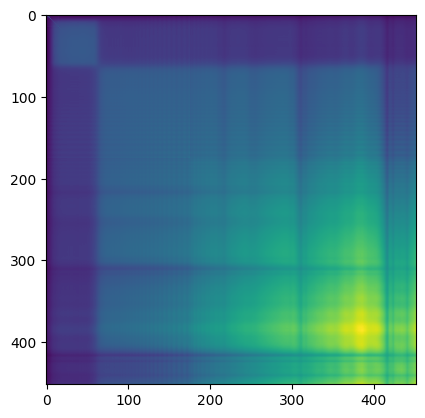

In [80]:
plt.imshow(cl.C);

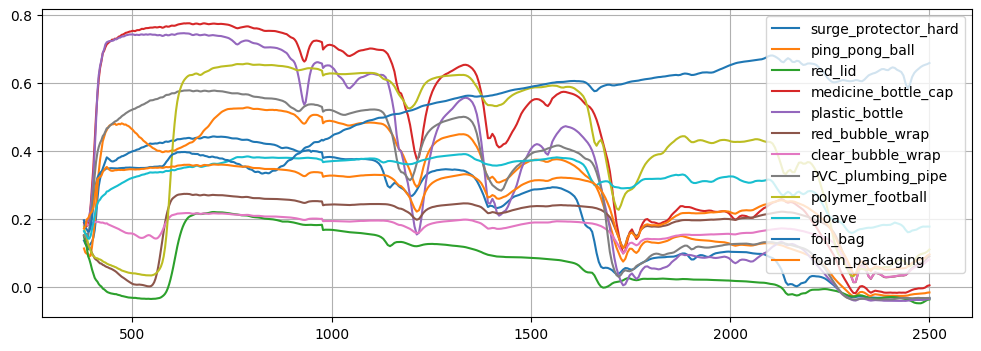

In [81]:
cl.plt_class_means()

In [96]:
import importlib
from hsiViewer import hsi_layers_viewer as hlv
importlib.reload(hlv)
layers = {
    'Ground Truth': cl.gt_im,
    'LDA Classification': cl.LDA_class_image
}
hlv.viewer(im, layers)

x,y = [651,123]
x,y = [678,140]
x,y = [541,112]
x,y = [686,129]
